In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
display(df.head())

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 01-a

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby('Species').count()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [8]:
df.describe(include='object')

,Species
count,150
unique,3
top,setosa
freq,50


In [10]:
datadict = pd.DataFrame(df.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df.isnull().sum()
datadict['%_Valores_Nulos'] = (df.isnull().sum() / df.shape[0]) * 100
datadict['NUnique']=df.nunique()

In [12]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
Sepal_Length,float64,0,0.0,35
Sepal_Width,float64,0,0.0,23
Petal_Length,float64,0,0.0,43
Petal_Width,float64,0,0.0,22
Species,object,0,0.0,3


### Resposta

No dataset foi possivel observar que possuimos 150 dados, temos o tamanho a largura de Petal e Sepal, tem uma média de 5.84 de Sepal Lenght e 3.06 de Sepal Width, ja de Pental Lenght temos 3.76 de média e de Petal Width 1.2.

Temos 3 tipos de espécies.

# 01-b

Text(0.5, 1.0, 'Histograma de Species')

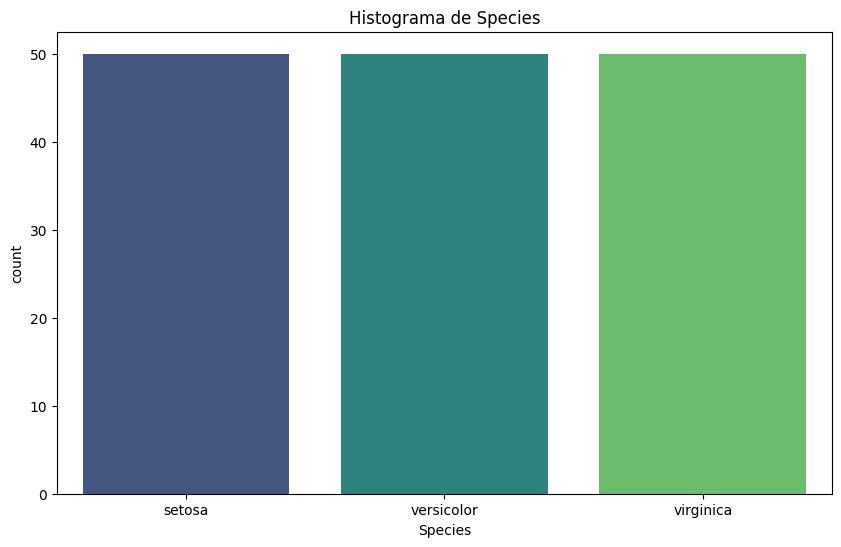

In [14]:
## Histograma variável Catégorica

palette = sns.color_palette("viridis", len(df['Species'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(df, x="Species",palette=palette).set_title('Histograma de Species')

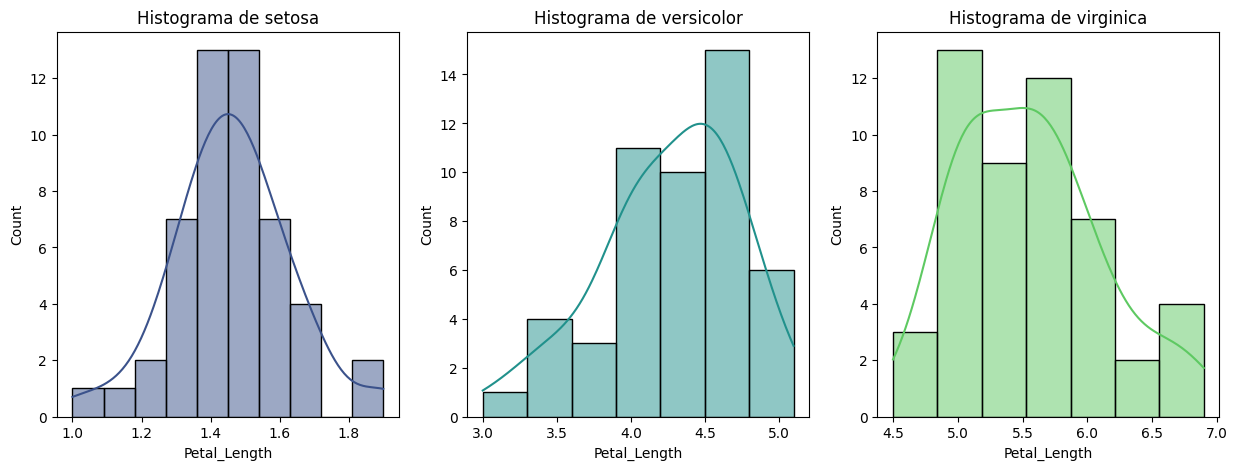

In [40]:
## Histograma para cada tipo de espécie

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, species in enumerate(df['Species'].unique()):
    sns.histplot(df[df['Species'] == species], x='Petal_Length', ax=ax[i], color=palette[i], kde=True)
    ax[i].set_title(f'Histograma de {species}')

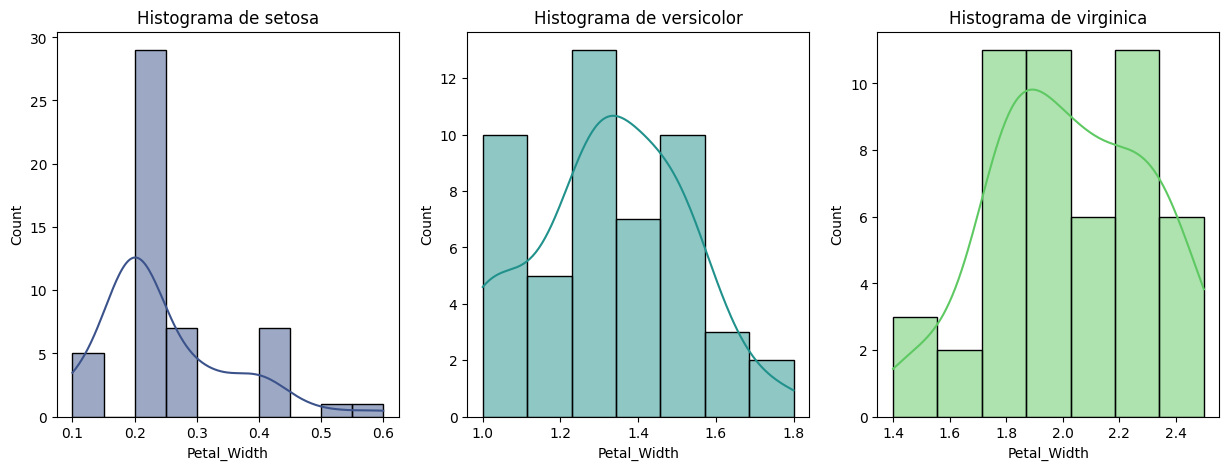

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, species in enumerate(df['Species'].unique()):
    sns.histplot(df[df['Species'] == species], x='Petal_Width', ax=ax[i], color=palette[i], kde=True)
    ax[i].set_title(f'Histograma de {species}')

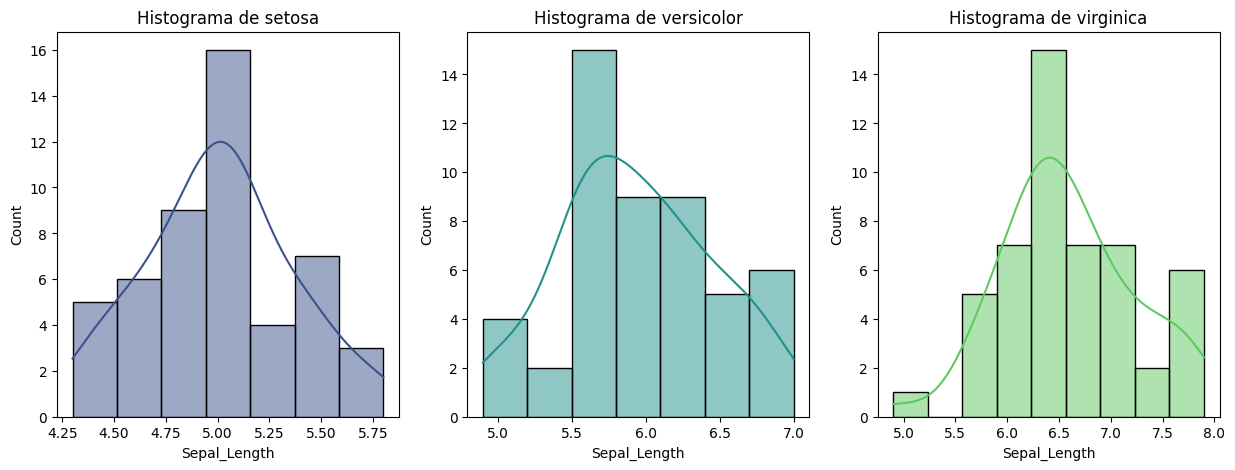

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, species in enumerate(df['Species'].unique()):
    sns.histplot(df[df['Species'] == species], x='Sepal_Length', ax=ax[i], color=palette[i], kde=True)
    ax[i].set_title(f'Histograma de {species}')

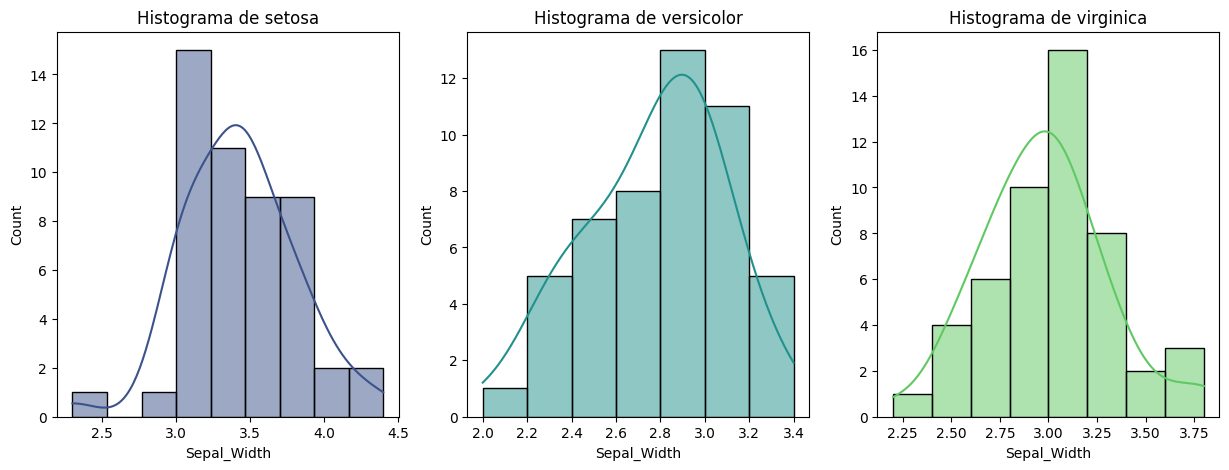

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, species in enumerate(df['Species'].unique()):
    sns.histplot(df[df['Species'] == species], x='Sepal_Width', ax=ax[i], color=palette[i], kde=True)
    ax[i].set_title(f'Histograma de {species}')

<Axes: xlabel='Species', ylabel='Petal_Width'>

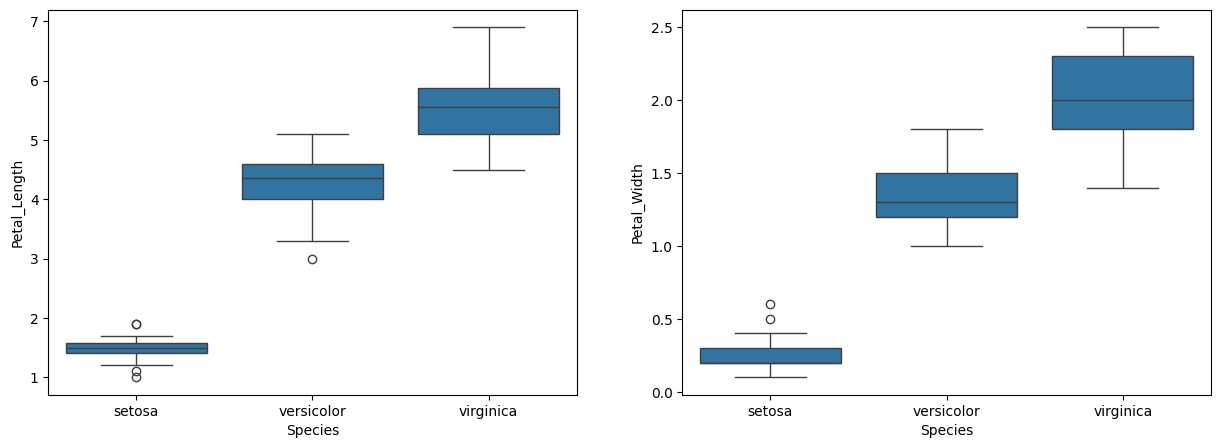

In [44]:
## Boxplot

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, x='Species', y='Petal_Length', ax=ax[0])
sns.boxplot(data=df, x='Species', y='Petal_Width', ax=ax[1])


<Axes: xlabel='Species', ylabel='Sepal_Width'>

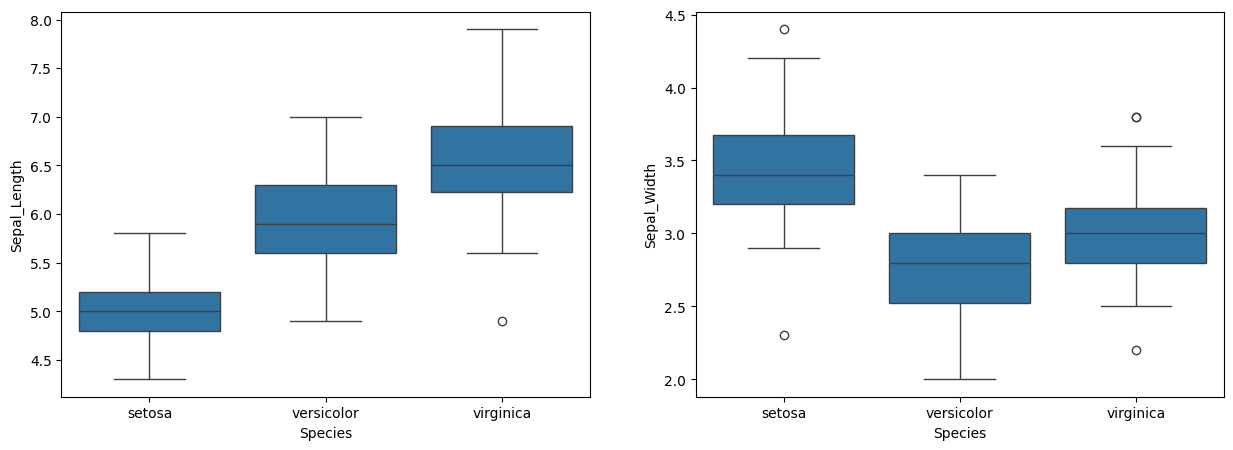

In [45]:
## Boxplot

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, x='Species', y='Sepal_Length', ax=ax[0])
sns.boxplot(data=df, x='Species', y='Sepal_Width', ax=ax[1])


# 01-c

Usando somente os gráficos de histogramas temos que para pétalas em seus tamanhos e larguras ate conseguimos bem diferenciar uma das outras:

Setosa tem seu Lenght indo de 1 a 2

Versicolor tem Lenght inde entre 3 a 5 

Virginica tem o Lenght indo de 4.5 a 7

A virginica poderia ser confundida um pouco com Versicolor no Lenght.


--------------------------------------------------------------------------------------------

Ja na parte de Widht temos os dados:

Setosa tem seu Width indo de 0 a 0.6

Versicolor tem Width inde entre 1 a 1.8

Virginica tem o Width indo de 1.4  a 2.4

A virginica poderia se confundir muito com a Versicolor, nesse quisito se faz mais difícil diferencia-las


-> Podemos usar uma abordagem de ver se o Lenght é o de 4.5 a 7 se caso a Virginica estiver entre os mesmos valores da Versicolor

Ja para as sépalas é mais dificil separa-las pelo Lenght ou Widht, elas possuem valores que todas possuem

# 01-d

In [47]:
#### leitura dos pacotes

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [48]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]

###### y contem a variavel de interesse
y = df[[ 'Species']]

In [49]:
###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## random_state para garantir a reprodutibilidade

# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
#### vamos agora aplicar o modelo fitado na base de test

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade de ter sobrevivido ou nao

In [51]:
##### mostrnado o output
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Species"] = y_pred_proba

In [52]:
X_test

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Previsao_Modelo,Probabilidade_Species
73,6.1,2.8,4.7,1.2,versicolor,0.827741
18,5.7,3.8,1.7,0.3,setosa,0.053019
118,7.7,2.6,6.9,2.3,virginica,0.001549
78,6.0,2.9,4.5,1.5,versicolor,0.792228
76,6.8,2.8,4.8,1.4,versicolor,0.774129
31,5.4,3.4,1.5,0.4,setosa,0.044095
64,5.6,2.9,3.6,1.3,versicolor,0.907691
141,6.9,3.1,5.1,2.3,virginica,0.154555
68,6.2,2.2,4.5,1.5,versicolor,0.762853
82,5.8,2.7,3.9,1.2,versicolor,0.945732


# 01-e

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

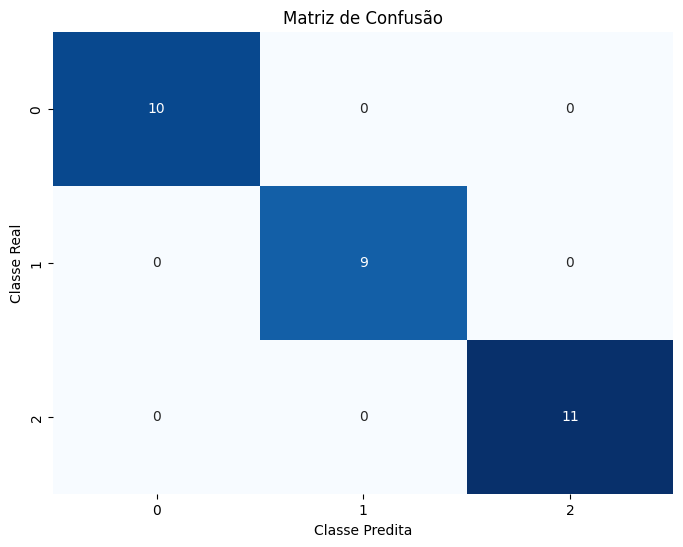

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0


In [56]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred) ## matriz de confusao, sendo o primeiro parametro a variavel real e o segundo a variavel prevista

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro') # altere 'micro' para 'macro' ou 'weighted' se preferir
recall = recall_score(y_test, y_pred, average='macro') # altere 'micro' para 'macro' ou 'weighted' se preferir
## acuracia, precisao e recall, eles são metodos do pacote sklearn 


# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

# 2

In [57]:
from sklearn.datasets import load_digits

In [58]:
digits = load_digits()

In [60]:
digits.data.shape

(1797, 64)

In [64]:
digits = pd.DataFrame(digits.data, columns=digits.feature_names)

In [66]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [67]:
digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [68]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [69]:
datadict = pd.DataFrame(digits.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = digits.isnull().sum()
datadict['%_Valores_Nulos'] = (digits.isnull().sum() / digits.shape[0]) * 100
datadict['NUnique']=digits.nunique()

In [72]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
pixel_0_0,float64,0,0.0,1
pixel_0_1,float64,0,0.0,9
pixel_0_2,float64,0,0.0,17
pixel_0_3,float64,0,0.0,17
pixel_0_4,float64,0,0.0,17
...,...,...,...,...
pixel_7_3,float64,0,0.0,17
pixel_7_4,float64,0,0.0,17
pixel_7_5,float64,0,0.0,17
pixel_7_6,float64,0,0.0,17


In [71]:
datadict.isna().sum()

Dtype              0
Valores_Nulos      0
%_Valores_Nulos    0
NUnique            0
dtype: int64

In [75]:
digits.describe(include='object')

ValueError: No objects to concatenate

### 02-a

Temos 1797 linha e 64 colunas.

Não temos dados nulos 

Não temos dados categóricos, podemos ver isso pelo erro dado acima

### 02-b

In [76]:
#### leitura dos pacotes

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]

###### y contem a variavel de interesse
y = df[[ 'Species']]